In [1]:
#this is the main file


#importing required libraries

from classes.constantsmd import *
from classes.gridmd import *
from classes.functionsmd import *
from numpy import sin, cos, deg2rad, matrix, size, invert, multiply, array, sqrt, ones, empty, sum, average, abs, log
from matplotlib.pyplot import plot, scatter, loglog


#import matplotlib.pyplot as plt
#from sympy import init_printing
#from mpl_toolkits.mplot3d import Axes3D
#import csv
#import pandas as pd
print("-----------start-----------")

called gridmd
called constantmd
called functionsmd
-----------start-----------


In [2]:
#N = N_xyz(10,6,6)
coor_0 = initialPos(N,ial)
xyz_grid = xyzGrid(coor_0[0], coor_0[1], coor_0[2])

In [3]:
time_grid = np.empty([N_steps,N[0],N[1],N[2],3])
time_grid[0] = np.array([xyz_grid])

force_grid = np.zeros([N_steps, N[0], N[1], N[2],3])

In [4]:
#%%timeit
t=0
for t in range(N_steps):
    for i in range(N[0]):
        for j in range(N[1]):
            for k in range(N[2]):
                #fx = forceXLJ3(i,j,k)
                #fy = forceYLJ3(i,j,k)
                #fz = forceZLJ3(i,j,k)
                fx, fy, fz = forceLJ3(i, j, k, xyz_grid)
                acc = (fx/mass)#+FaByMass
                xj=verlet_pos(time_grid[t][i][j][k][0],t,ts,acc)
                yj=verlet_pos(time_grid[t][i][j][k][1], t, ts, 
                              fy/mass)
                zj=verlet_pos(time_grid[t][i][j][k][2], t, ts, 
                              fz/mass)
                time_grid[t][i][j][k][0] = xj
                time_grid[t][i][j][k][1] = yj
                time_grid[t][i][j][k][2] = zj
                
                force_grid[t][i][j][k][0] = fx;force_grid[t][i][j][k][1] = fy;force_grid[t][i][j][k][2] = fz

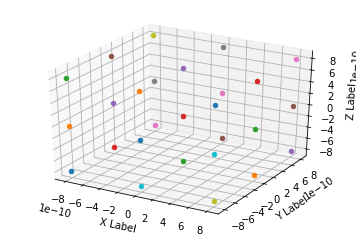

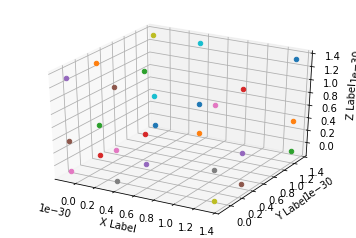

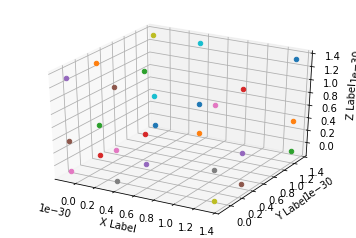

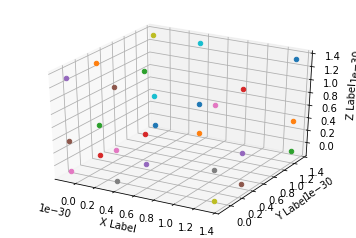

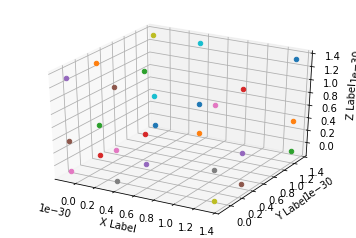

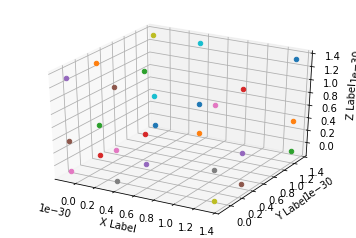

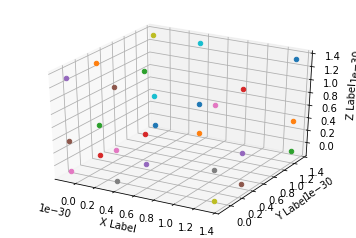

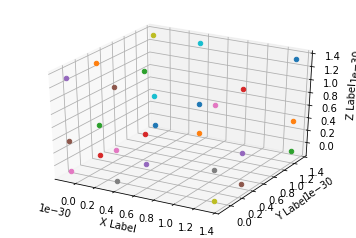

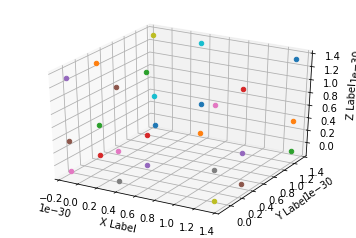

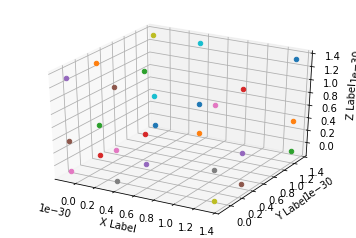

In [5]:
for time in range(N_steps):
    fig0 = plt.figure()
    ax = fig0.add_subplot(111, projection='3d')
    for i in time_grid[time,:,0,0,0]:
        for j in time_grid[time,0,:,0,1]:
            for k in time_grid[time,0,0,:,2]:
                ax.scatter(i,j,k)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

In [6]:
def timeForceMeanAndTimeStress():
    time_forceMean = np.zeros([N_steps, 3])
    time_stress = np.zeros([N_steps, 3])
    fxMean = 0;fyMean = 0;fzMean = 0;
    for t in range(N_steps):
        for i in range(N[0]):
            for j in range(N[1]):
                for k in range(N[2]):
                    fxMean+=force_grid[t][i][j][k][0]
                    fyMean+=force_grid[t][i][j][k][1]
                    fzMean+=force_grid[t][i][j][k][2]
        fxMean = fxMean/N[0];fyMean = fyMean/N[1];fzMean = fzMean/N[2];
        time_stress[t] = np.array([fxMean/(N[1]*N[2]*ial**2), fyMean/(N[2]*N[0]*ial**2), fzMean/(N[1]*N[0]*ial**2)])
        time_forceMean[t] = np.array([fxMean, fyMean, fzMean])
    return time_forceMean, time_stress

In [7]:
time_forceMean, time_stress = timeForceMeanAndTimeStress()

In [8]:
time_stress[:,0]

array([  8.89287182e-15,   1.18571624e-14,   1.28452593e-14,
         1.31746249e-14,   1.32844135e-14,   1.33210096e-14,
         1.33332084e-14,   1.33372746e-14,   1.33386300e-14,
         1.33390818e-14])

In [9]:
strainXYZ = np.zeros([N[0], N[1], N[2], 3])
time_strainXYZ = np.zeros([N_steps, N[0], N[1], N[2], 3])
time_strainXYZ[0] = strainXYZ
for t in range(N_steps):
    if t==0:
        pass #strainX[t] = 0
    else:
        strainXYZ = abs(time_grid[t]-time_grid[0])/ial
        time_strainXYZ[t] = strainXYZ

In [10]:
#time_strainMean = np.zeros([N_steps, 3])

In [11]:
def timeStrainMean():
    time_strainMean = np.zeros([N_steps, 3])
    StrainXMean = 0;StrainYMean = 0;StrainZMean = 0;
    for t in range(N_steps):
        for i in range(N[0]):
            for j in range(N[1]):
                for k in range(N[2]):
                    StrainXMean+=time_strainXYZ[t][i][j][k][0]
                    StrainYMean+=time_strainXYZ[t][i][j][k][1]
                    StrainZMean+=time_strainXYZ[t][i][j][k][2]
        StrainXMean = StrainXMean/N[0];StrainYMean = StrainYMean/N[1];StrainZMean = StrainZMean/N[2];
        time_strainMean[t] = np.array([StrainXMean, StrainYMean, StrainZMean])
    return time_strainMean

In [12]:
time_strainMean = timeStrainMean()
print(time_strainMean)

[[  0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  1.20000000e+001   1.20000000e+001               nan]
 [  1.60000000e+001   1.60000000e+001               nan]
 [  1.73333333e+001   1.73333333e+001               nan]
 [  1.77777778e+001   1.77777778e+001               nan]
 [  1.79259259e+001   1.79259259e+001               nan]
 [  1.79753086e+001   1.79753086e+001               nan]
 [  1.79917695e+001   1.79917695e+001               nan]
 [  1.60485514e+207   1.79972565e+001               nan]
 [  5.34951712e+206   1.79990855e+001               nan]]


(array([[ 12.        ,  12.        ,          nan],
        [ 16.        ,  16.        ,          nan],
        [ 17.33333333,  17.33333333,          nan],
        [ 17.77777778,  17.77777778,          nan],
        [ 17.92592593,  17.92592593,          nan],
        [ 17.97530864,  17.97530864,          nan]]),
 array([[  8.89287182e-15,   8.89287182e-15,   8.89287182e-15],
        [  1.18571624e-14,   1.18571624e-14,   1.18571624e-14],
        [  1.28452593e-14,   1.28452593e-14,   1.28452593e-14],
        [  1.31746249e-14,   1.31746249e-14,   1.31746249e-14],
        [  1.32844135e-14,   1.32844135e-14,   1.32844135e-14],
        [  1.33210096e-14,   1.33210096e-14,   1.33210096e-14],
        [  1.33332084e-14,   1.33332084e-14,   1.33332084e-14],
        [  1.33372746e-14,   1.33372746e-14,   1.33372746e-14],
        [  1.33386300e-14,   1.33386300e-14,   1.33386300e-14],
        [  1.33390818e-14,   1.33390818e-14,   1.33390818e-14]]))

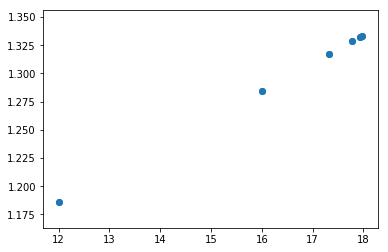

In [30]:
start = 1
nh = 7
scatter(time_strainMean[start:nh], time_stress[start:nh]/1e-14)
time_strainMean[start:nh],time_stress

In [14]:
for i in range(N_steps):
    print(time_stress[i,0],time_strainMean[i,0])

8.89287181837e-15 0.0
1.18571624245e-14 12.0
1.28452592932e-14 16.0
1.31746249161e-14 17.3333333334
1.32844134571e-14 17.7777777778
1.33210096374e-14 17.925925926
1.33332083642e-14 17.975308642
1.33372746064e-14 17.9917695474
1.33386300205e-14 1.60485513516e+207
1.33390818252e-14 5.34951711721e+206


In [15]:
for i in range(N_steps):
    print( (time_stress[i][0]/time_strainMean[i][0]) )

inf
9.88096868706e-16
8.02828705823e-16
7.60074514389e-16
7.47248256959e-16
7.43114173985e-16
7.41751289488e-16
7.41298657217e-16
8.31142308627e-222
2.49351138298e-221


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [25]:
for i in range(N_steps):
    print(time_grid[i,2,2,2,0])

8.08000000002e-10
-1.1190036644e-31
-1.1190036644e-31
-1.1190036644e-31
-1.1190036644e-31
-1.1190036644e-31
-1.1190036644e-31
-1.1190036644e-31
-1.1190036644e-31
-1.1190036644e-31


In [18]:
def beepWin():
    import winsound
    duration = 1000  # millisecond
    freq = 440  # Hz
    winsound.Beep(freq, duration)
def beepLinux():
    import os
    os.system('spd-say "your program is finished"')
    
beepLinux()

In [ ]:
print("------------end------------")